# Titanic

Se pretende delucidar, la probabilidad de supervivencia que posee un individuo, dadas sus características, entre las que se destacan: edad, tiket class, género, entre otras.

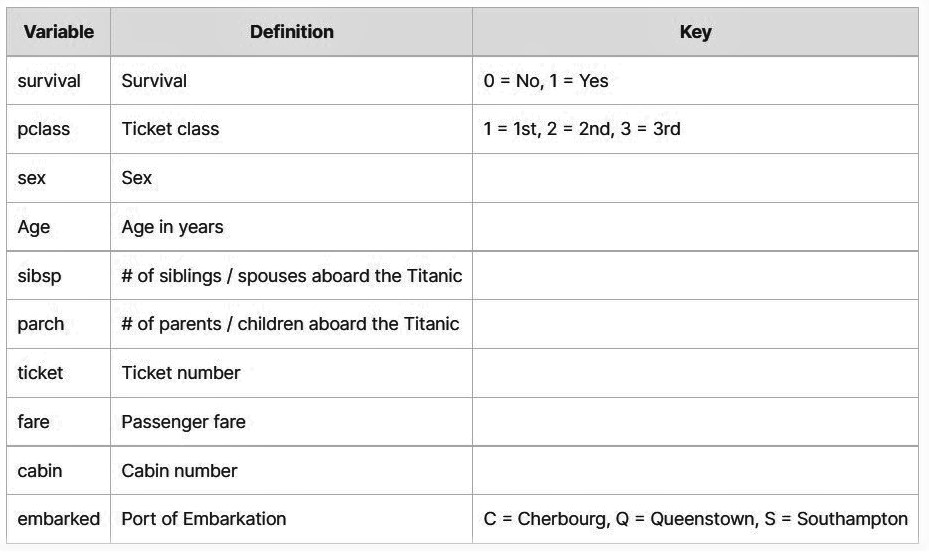

Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
#carga de librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Carga de datos 

In [2]:
df_train = pd.read_csv('D:/Backup/Documents/Scripts pyton/Supervivencia_Titanic/train.csv')
df_test = pd.read_csv ('D:/Backup/Documents/Scripts pyton/Supervivencia_Titanic/test.csv')

In [3]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


# Validación de datos 

In [5]:
print('Número de entrenamiento', df_train.shape)
print('Numero de test         ',df_test.shape)

Número de entrenamiento (891, 12)
Numero de test          (418, 11)


In [6]:
# Copiar la data train, esto ayuda a la visualizar, de las tendencias en data cruda , sin estandarizar y transfromar 

df_train_copy = df_train.copy()

La data posee 12 variables, con 891 observaciones

In [7]:
# Tipo de variables 
df_train.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [8]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

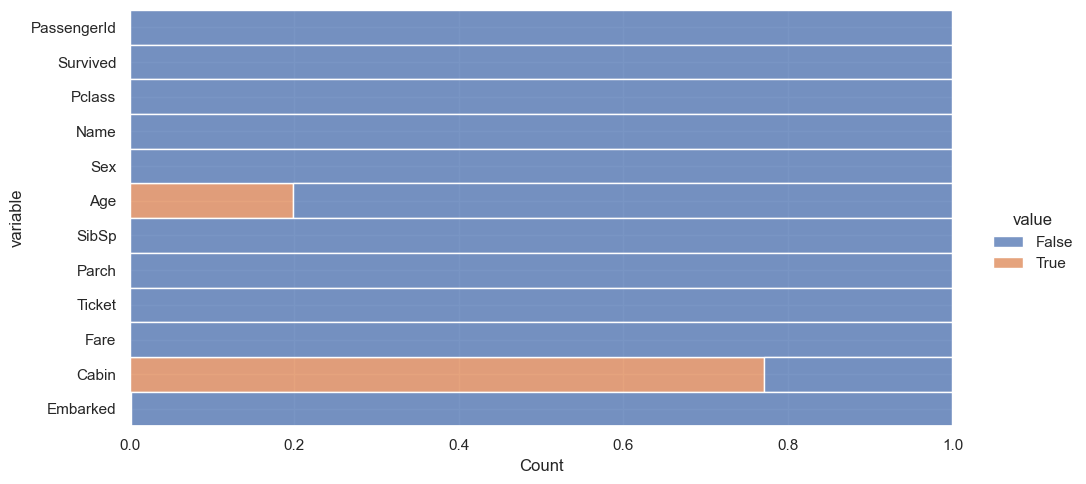

In [10]:
# Explrar graficamente el data frame 
(
    df_train
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data= df,
                y='variable',
                hue='value',
                multiple="fill",
                aspect= 2
            )
        )

    )
)
plt.show()

la variable edad "age" al tener datos faltates es requerido imputar data, la cual se hará con la media  

la variable cabina "cabina" se imputará con la media de los datos, al igual que la variable name, al no aportar valor a la data 


# imputacón de datos y eliminación de variables no relevantes 

In [11]:
# eliminar variebles
df_train.drop(columns= ['Cabin','Name', 'Ticket'], axis= 1, inplace= True)

In [12]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


## imputar data 

In [13]:
# imputar con la  media los datos faltantes en la edad 

df_train['Age'].fillna(df_train['Age'].mean(), inplace= True)

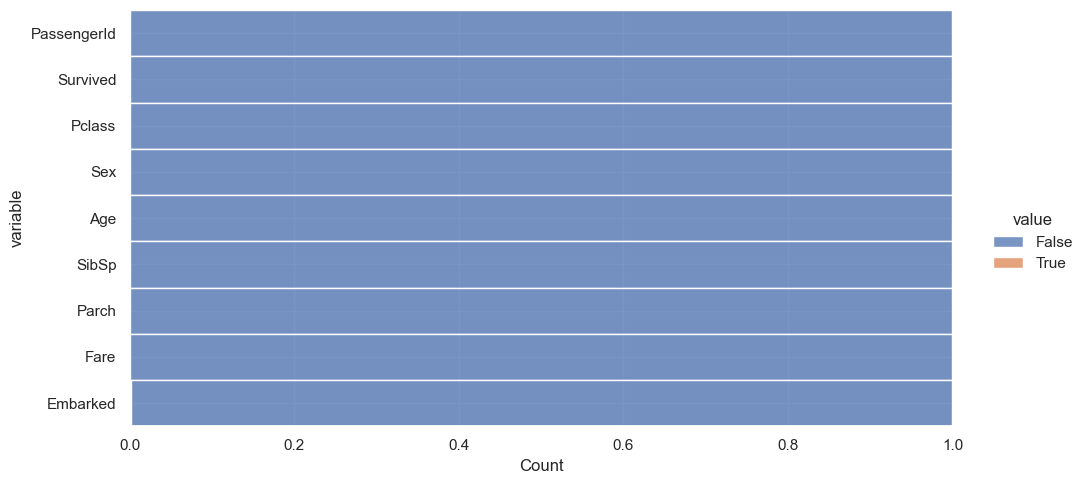

In [14]:
# Explrar graficamente el data frame 
(
    df_train
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data= df,
                y='variable',
                hue='value',
                multiple="fill",
                aspect= 2
            )
        )

    )
)
plt.show()

In [15]:
df_train.dropna(inplace= True)

In [16]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Comvertir variables categoricas en dummies

In [17]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [18]:
# Eliminar varibles del dt para luego ser concatenadas

Sex = pd.get_dummies(df_train['Sex'], drop_first= True)
Embarked = pd.get_dummies(df_train['Embarked'], drop_first= True)

In [19]:
df_train.drop(['Sex','Embarked'],axis=1, inplace= True)

In [20]:
# Concaenar varooebles, se coloca axis = 1 para determinar las columnas 

df_train = pd.concat([df_train, Sex, Embarked], axis= 1)

In [21]:
df_train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


Para crear las variables dummies o one hot, es requerido (K-1) variebles para evitar el problema de multicolinealidad

# Exploración dedatos

In [22]:
df_train_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
df_train_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

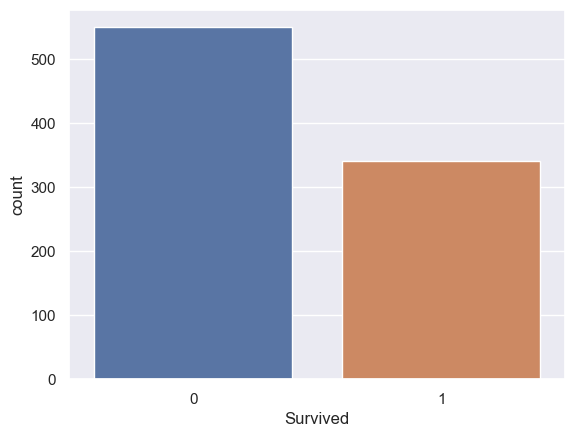

In [58]:
# Proporción de supervivientes 
fig = sns.countplot(
    data= df_train,
    x= 'Survived'
)
plt.show()

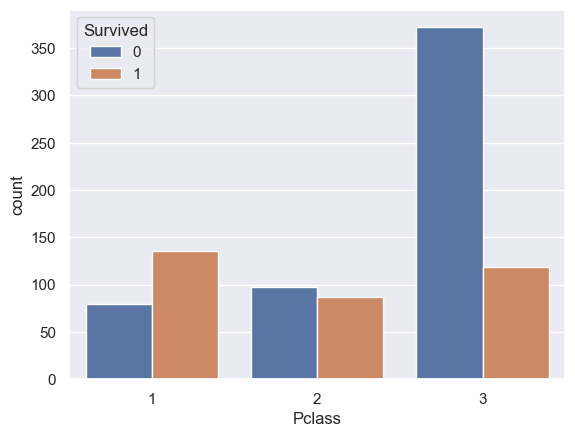

In [60]:
fig = sns.countplot(
    data= df_train_copy,
    x= 'Pclass',
    hue= 'Survived'
)
plt.show()

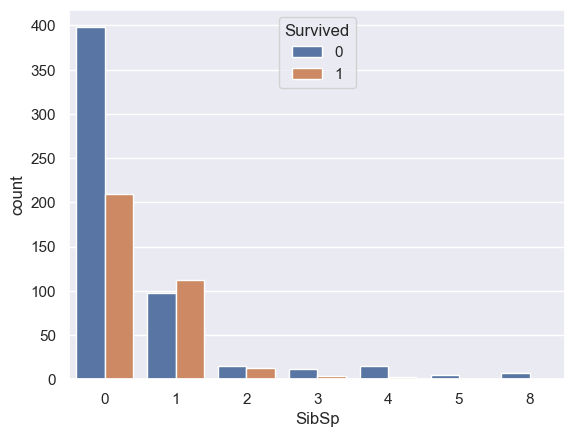

In [62]:
fig = sns.countplot(
    data= df_train_copy,
    x= 'SibSp',
    hue= 'Survived'
)
plt.show()

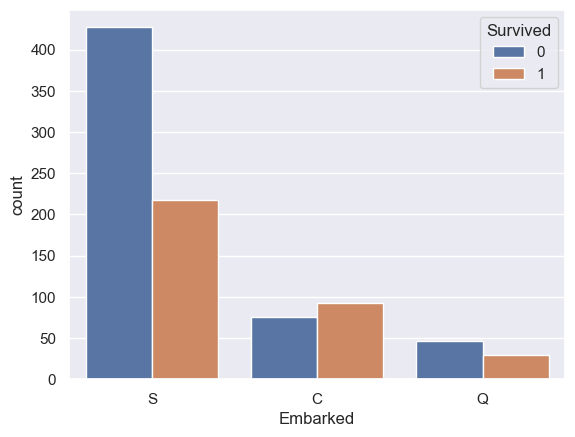

In [71]:
fig = sns.countplot(
    data= df_train_copy,
    x= 'Embarked',
    hue= 'Survived'
)
plt.show()

Notas:

* Alrededor de 550 personas no sobreviven, 350 pasajeros sobreviven 
* Los pajareros de primera clase tiene mayor probabilidad de supervivencia 
* En promedio los pasajeros con mejor número de familiares abordo (SibSp) tienen mayor posibilidades de supervivencia 
* Los pasajeros que embarcaron en Southampton  poseen mayor probabilidad de supervivencia 
